In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.DataFrame(pd.read_csv("/kaggle/input/medical-ins-prediction/medical_insurance.csv"))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**# DATA ANALYSIS DASHBOARD**

Total peoples distributed accross which regions



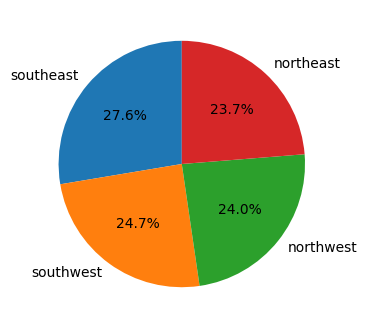

Gender diversity



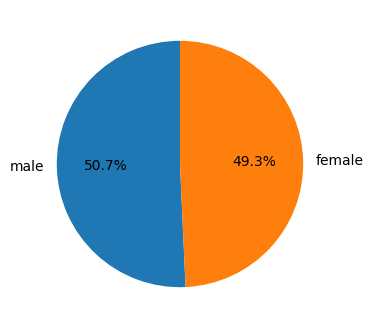



No. of individuals have children



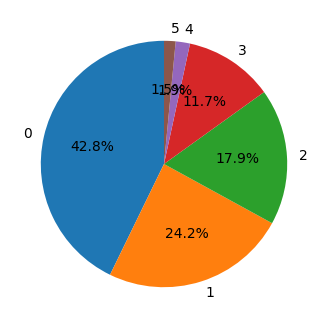



No. of individuals have children by region

children     0    1    2   3   4   5
region                              
northeast  296  158  104  80  14   6
northwest  268  150  134  96  12   4
southeast  330  202  140  72  10  12
southwest  292  162  118  76  16  20


Region with avg bmi mean
      region        bmi
0  northeast  29.157781
1  northwest  29.147259
2  southeast  33.478773
3  southwest  30.584503


Max bmi of a region
      region    bmi
0  northeast  48.07
1  northwest  42.94
2  southeast  53.13
3  southwest  47.60



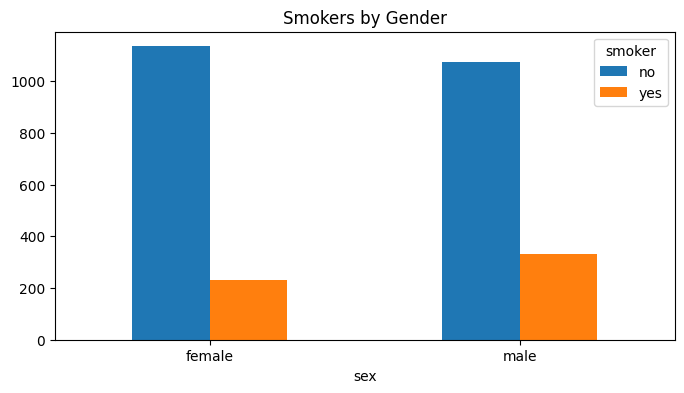

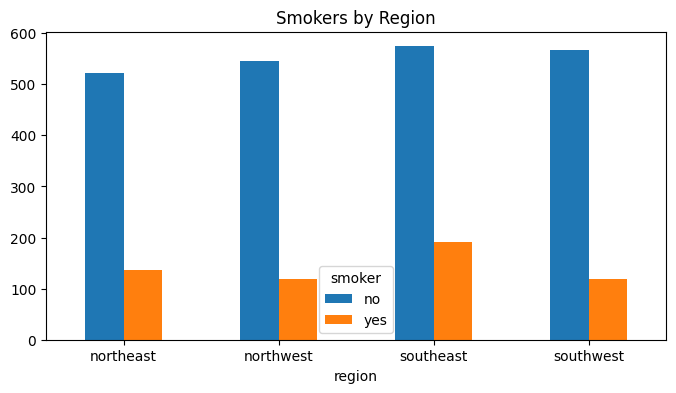


Avg charges in each region
      region       charges
0  northeast  13475.874737
1  northwest  12463.129315
2  southeast  14748.777706
3  southwest  12164.196435


Max Charged insurance
      region      charges
0  northeast  58571.07448
1  northwest  60021.39897
2  southeast  63770.42801
3  southwest  52590.82939





In [46]:
print("========================================================")
print("Total peoples distributed accross which regions\n")
value = df['region'].value_counts()
plt.figure(figsize = (8,4))
plt.pie(value.values,autopct = '%1.1f%%',startangle = 90,labels = value.index)
plt.show()
print("========================================================")
print("Gender diversity\n")
value = df['sex'].value_counts()
plt.figure(figsize = (8,4))
plt.pie(value.values,autopct = '%1.1f%%',labels = value.index, startangle = 90)
plt.show()
print('\n')
print("No. of individuals have children\n")
value = df['children'].value_counts()
plt.figure(figsize = (8,4))
plt.pie(value.values,autopct = '%1.1f%%',labels = value.index, startangle = 90)
plt.show()
print('\n')
print("No. of individuals have children by region\n")
value = df.groupby('region')['children'].value_counts().unstack()
print(value)
print('\n')
print("========================================================")
print('Region with avg bmi mean')
value = df.groupby('region')['bmi'].mean().reset_index()
print(value)
print('\n')
print('Max bmi of a region')
value1 = df.groupby('region')['bmi'].max().reset_index()
print(value1)
print("========================================================\n")
value = df.groupby('sex')['smoker'].value_counts().unstack()
value.plot(kind="bar", figsize=(8,4))
plt.title("Smokers by Gender")
plt.xticks(rotation=0)
plt.show()
print("\n")
value = df.groupby('region')['smoker'].value_counts().unstack()
value.plot(kind="bar", figsize=(8,4))
plt.title("Smokers by Region")
plt.xticks(rotation=0)
plt.show()
print("========================================================\n")
value = df.groupby('region')['charges'].mean().reset_index()
print("Avg charges in each region")
print(value)
print('\n')
print("Max Charged insurance")
value = df.groupby('region')['charges'].max().reset_index()
print(value)
print('\n')
print("========================================================\n")


MODEL TRAINING 

In [84]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
X = df.drop(columns = ['charges','children'],axis = 1)
Y = df['charges']
for col in ['sex', 'smoker', 'region']:
    X[col] = LabelEncoder().fit_transform(X[col])
Y = MinMaxScaler().fit_transform(Y.values.reshape(-1,1))
X_train,X_test,y_train,y_test = train_test_split(X,Y.ravel(),test_size = 0.2,random_state = 42)

In [86]:
model = RandomForestRegressor(n_estimators = 2000)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=2000)

In [87]:
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.002013595349485167
R2 Score: 0.9485079947431905
